In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Loan_default.csv')

In [3]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [4]:
df.size

4596246

In [5]:
df.shape

(255347, 18)

In [6]:
df['Default'].value_counts()

Default
0    225694
1     29653
Name: count, dtype: int64

In [7]:
df.drop('LoanID',inplace=True,axis=1)

In [8]:
x = df.iloc[:,:-1]
y = df['Default']
y

0         0
1         0
2         1
3         0
4         0
         ..
255342    0
255343    1
255344    0
255345    0
255346    0
Name: Default, Length: 255347, dtype: int64

In [9]:
# from imblearn import under_sampling
# from imblearn.under_sampling import RandomUnderSampler
# rus = RandomUnderSampler(random_state=12)
# x_sampled , y_sampled = rus.fit_resample(x,y)

In [10]:
from imblearn.over_sampling import RandomOverSampler

In [11]:
# Apply random oversampling
over_sampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
x_sampled, y_sampled = over_sampler.fit_resample(x, y)

In [12]:
print(x_sampled.shape)
print(y_sampled.shape)

(451388, 16)
(451388,)


In [13]:
x_sampled.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No


In [14]:
y_sampled.head()

0    0
1    0
2    1
3    0
4    0
Name: Default, dtype: int64

In [15]:
y_sampled.value_counts()

Default
0    225694
1    225694
Name: count, dtype: int64

In [16]:
data = pd.concat([x_sampled,y_sampled],axis=1)

In [17]:
data.sample(4)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
8683,61,86181,133993,593,22,2,9.95,36,0.33,High School,Full-time,Single,No,No,Auto,No,0
45174,19,52916,157988,679,71,4,19.64,12,0.11,High School,Part-time,Married,Yes,Yes,Auto,No,0
348945,62,42599,72999,382,32,4,15.54,36,0.14,High School,Part-time,Married,No,Yes,Business,No,1
190020,27,31210,63351,513,58,4,16.16,12,0.60,PhD,Full-time,Single,Yes,Yes,Business,Yes,0


In [18]:
data.shape

(451388, 17)

In [19]:
data['Default'].value_counts()

Default
0    225694
1    225694
Name: count, dtype: int64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451388 entries, 0 to 451387
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             451388 non-null  int64  
 1   Income          451388 non-null  int64  
 2   LoanAmount      451388 non-null  int64  
 3   CreditScore     451388 non-null  int64  
 4   MonthsEmployed  451388 non-null  int64  
 5   NumCreditLines  451388 non-null  int64  
 6   InterestRate    451388 non-null  float64
 7   LoanTerm        451388 non-null  int64  
 8   DTIRatio        451388 non-null  float64
 9   Education       451388 non-null  object 
 10  EmploymentType  451388 non-null  object 
 11  MaritalStatus   451388 non-null  object 
 12  HasMortgage     451388 non-null  object 
 13  HasDependents   451388 non-null  object 
 14  LoanPurpose     451388 non-null  object 
 15  HasCoSigner     451388 non-null  object 
 16  Default         451388 non-null  int64  
dtypes: float64

In [21]:
data.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,451388.000000,451388.000000,451388.000000,451388.000000,451388.000000,451388.000000,451388.000000,451388.000000,451388.000000,451388.000000
mean,40.490044,77825.377979,134932.231094,567.938140,55.517905,2.538608,14.535603,36.023474,0.505551,0.500000
std,14.926305,40119.107474,70758.132733,158.890587,34.631879,1.117906,6.605862,16.986302,0.230154,0.500001
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,27.000000,41642.000000,74873.000000,430.000000,25.000000,2.000000,9.000000,24.000000,0.310000,0.000000
50%,39.000000,76103.000000,138557.000000,565.000000,54.000000,3.000000,15.020000,36.000000,0.510000,0.500000
75%,53.000000,112697.250000,197363.000000,704.000000,85.000000,4.000000,20.350000,48.000000,0.710000,1.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [22]:
data[data.duplicated()]

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
255347,25,48955,47159,310,74,3,17.12,12,0.87,High School,Unemployed,Divorced,No,No,Home,No,1
255348,41,17662,245898,754,58,4,18.86,24,0.73,High School,Unemployed,Married,No,No,Other,Yes,1
255349,21,116115,56393,557,78,4,21.93,24,0.32,High School,Self-employed,Single,Yes,Yes,Education,No,1
255350,60,15679,173526,630,50,2,24.61,48,0.33,High School,Unemployed,Divorced,No,Yes,Other,Yes,1
255351,47,35168,90649,510,48,1,18.67,12,0.50,Master's,Unemployed,Single,Yes,No,Business,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451383,26,97448,136044,441,31,3,22.61,36,0.73,Master's,Self-employed,Married,No,No,Education,No,1
451384,28,119005,237171,801,109,3,19.40,60,0.71,PhD,Full-time,Married,Yes,Yes,Other,No,1
451385,41,26513,97540,518,18,4,24.85,12,0.29,High School,Self-employed,Divorced,Yes,Yes,Business,No,1
451386,38,30612,112311,353,70,4,4.73,36,0.86,PhD,Part-time,Divorced,Yes,No,Business,No,1


<Axes: >

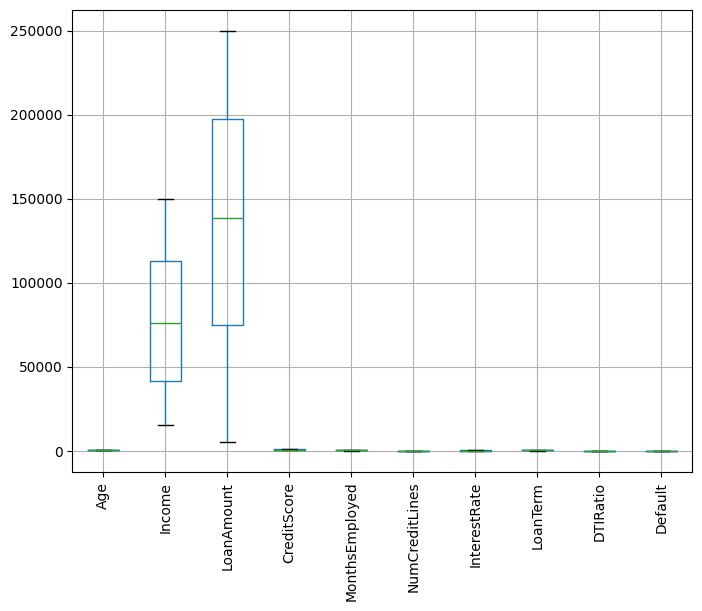

In [23]:
plt.figure(figsize=(8, 6))
data.boxplot(rot=90)


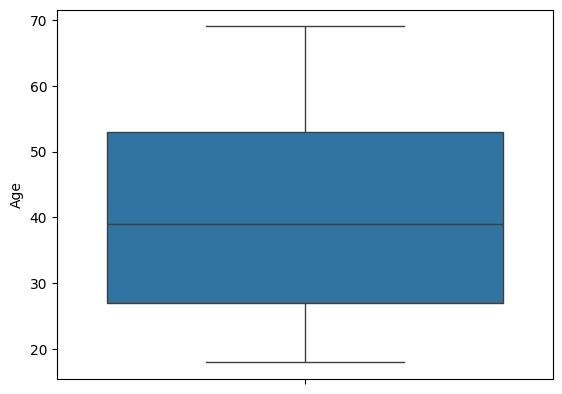

In [24]:
sns.boxplot(data['Age'])
plt.show()

In [25]:
data['Education'].value_counts()

Education
High School    118384
Bachelor's     116026
Master's       109136
PhD            107842
Name: count, dtype: int64

In [26]:
from sklearn.preprocessing import OrdinalEncoder

In [27]:
categories = [['High School','Bachelor\'s','Master\'s','PhD']]

In [28]:
oe = OrdinalEncoder(categories=categories)
oe

OrdinalEncoder(categories=[['High School', "Bachelor's", "Master's", 'PhD']])

In [29]:
a = oe.fit_transform(data[['Education']])

In [30]:
data['Education'] = a

In [31]:
data['Education'] = data['Education'].astype('int')

In [32]:
data.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,1,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,2,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,2,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,0,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,1,Unemployed,Divorced,No,Yes,Auto,No,0


In [33]:
data['EmploymentType'].value_counts()

EmploymentType
Unemployed       120737
Part-time        115044
Self-employed    112336
Full-time        103271
Name: count, dtype: int64

In [34]:
b= pd.get_dummies(data['EmploymentType'],drop_first=True,dtype=int)


In [35]:
data = pd.concat([data,b],axis= 1)

In [36]:
data.drop('EmploymentType',axis = 1,inplace=True)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451388 entries, 0 to 451387
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             451388 non-null  int64  
 1   Income          451388 non-null  int64  
 2   LoanAmount      451388 non-null  int64  
 3   CreditScore     451388 non-null  int64  
 4   MonthsEmployed  451388 non-null  int64  
 5   NumCreditLines  451388 non-null  int64  
 6   InterestRate    451388 non-null  float64
 7   LoanTerm        451388 non-null  int64  
 8   DTIRatio        451388 non-null  float64
 9   Education       451388 non-null  int32  
 10  MaritalStatus   451388 non-null  object 
 11  HasMortgage     451388 non-null  object 
 12  HasDependents   451388 non-null  object 
 13  LoanPurpose     451388 non-null  object 
 14  HasCoSigner     451388 non-null  object 
 15  Default         451388 non-null  int64  
 16  Part-time       451388 non-null  int32  
 17  Self-emplo

In [38]:
data.head(3)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,Part-time,Self-employed,Unemployed
0,56,85994,50587,520,80,4,15.23,36,0.44,1,Divorced,Yes,Yes,Other,Yes,0,0,0,0
1,69,50432,124440,458,15,1,4.81,60,0.68,2,Married,No,No,Other,Yes,0,0,0,0
2,46,84208,129188,451,26,3,21.17,24,0.31,2,Divorced,Yes,Yes,Auto,No,1,0,0,1


In [39]:
data['MaritalStatus'].value_counts()

MaritalStatus
Divorced    155585
Single      151793
Married     144010
Name: count, dtype: int64

In [40]:
c = pd.get_dummies(data['MaritalStatus'],drop_first=True,dtype=int)
c

,Married,Single
0,0,0
1,1,0
2,0,0
3,1,0
4,0,0
...,...,...
451383,1,0
451384,1,0
451385,0,0
451386,0,0


In [41]:
data = pd.concat([data, c],axis=1)

In [42]:
data.head(2)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,...,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,Part-time,Self-employed,Unemployed,Married,Single
0,56,85994,50587,520,80,4,15.23,36,0.44,1,...,Yes,Yes,Other,Yes,0,0,0,0,0,0
1,69,50432,124440,458,15,1,4.81,60,0.68,2,...,No,No,Other,Yes,0,0,0,0,1,0


In [43]:
data.drop('MaritalStatus',axis = 1 ,inplace=True)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451388 entries, 0 to 451387
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             451388 non-null  int64  
 1   Income          451388 non-null  int64  
 2   LoanAmount      451388 non-null  int64  
 3   CreditScore     451388 non-null  int64  
 4   MonthsEmployed  451388 non-null  int64  
 5   NumCreditLines  451388 non-null  int64  
 6   InterestRate    451388 non-null  float64
 7   LoanTerm        451388 non-null  int64  
 8   DTIRatio        451388 non-null  float64
 9   Education       451388 non-null  int32  
 10  HasMortgage     451388 non-null  object 
 11  HasDependents   451388 non-null  object 
 12  LoanPurpose     451388 non-null  object 
 13  HasCoSigner     451388 non-null  object 
 14  Default         451388 non-null  int64  
 15  Part-time       451388 non-null  int32  
 16  Self-employed   451388 non-null  int32  
 17  Unemployed

In [45]:
data['LoanPurpose'].value_counts()

LoanPurpose
Business     92938
Education    90903
Other        90808
Auto         90684
Home         86055
Name: count, dtype: int64

In [46]:
d = pd.get_dummies(data['LoanPurpose'],drop_first=True,dtype=int)

In [47]:
data = pd.concat([data,d],axis=1)

In [48]:
data.drop('LoanPurpose',axis=1,inplace=True)

In [49]:
data.head(3)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,...,Default,Part-time,Self-employed,Unemployed,Married,Single,Business,Education,Home,Other
0,56,85994,50587,520,80,4,15.23,36,0.44,1,...,0,0,0,0,0,0,0,0,0,1
1,69,50432,124440,458,15,1,4.81,60,0.68,2,...,0,0,0,0,1,0,0,0,0,1
2,46,84208,129188,451,26,3,21.17,24,0.31,2,...,1,0,0,1,0,0,0,0,0,0


In [50]:
# A mortgage is a type of loan that is specifically used to purchase real estate, typically a home. When someone has a mortgage, it means they 
# have borrowed money to buy a property, and the property itself serves as collateral for the loan.

data['HasMortgage'].value_counts()

HasMortgage
No     231892
Yes    219496
Name: count, dtype: int64

In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
le = LabelEncoder()

In [53]:
data['HasMortgage'] = le.fit_transform(data['HasMortgage'])

In [54]:
data['HasMortgage'].head()

0    1
1    0
2    1
3    0
4    0
Name: HasMortgage, dtype: int32

In [55]:
data['HasCoSigner'].value_counts()

HasCoSigner
No     236061
Yes    215327
Name: count, dtype: int64

In [56]:
data['HasCoSigner'] = le.fit_transform(data['HasCoSigner'])

In [57]:
data['HasDependents'].value_counts()

HasDependents
No     234607
Yes    216781
Name: count, dtype: int64

In [58]:
data['HasDependents'] = le.fit_transform(data['HasDependents'])

In [59]:
data.columns

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education',
       'HasMortgage', 'HasDependents', 'HasCoSigner', 'Default', 'Part-time',
       'Self-employed', 'Unemployed', 'Married', 'Single', 'Business',
       'Education', 'Home', 'Other'],
      dtype='object')

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451388 entries, 0 to 451387
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             451388 non-null  int64  
 1   Income          451388 non-null  int64  
 2   LoanAmount      451388 non-null  int64  
 3   CreditScore     451388 non-null  int64  
 4   MonthsEmployed  451388 non-null  int64  
 5   NumCreditLines  451388 non-null  int64  
 6   InterestRate    451388 non-null  float64
 7   LoanTerm        451388 non-null  int64  
 8   DTIRatio        451388 non-null  float64
 9   Education       451388 non-null  int32  
 10  HasMortgage     451388 non-null  int32  
 11  HasDependents   451388 non-null  int32  
 12  HasCoSigner     451388 non-null  int32  
 13  Default         451388 non-null  int64  
 14  Part-time       451388 non-null  int32  
 15  Self-employed   451388 non-null  int32  
 16  Unemployed      451388 non-null  int32  
 17  Married   

In [61]:
data.head(3)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,...,Default,Part-time,Self-employed,Unemployed,Married,Single,Business,Education,Home,Other
0,56,85994,50587,520,80,4,15.23,36,0.44,1,...,0,0,0,0,0,0,0,0,0,1
1,69,50432,124440,458,15,1,4.81,60,0.68,2,...,0,0,0,0,1,0,0,0,0,1
2,46,84208,129188,451,26,3,21.17,24,0.31,2,...,1,0,0,1,0,0,0,0,0,0


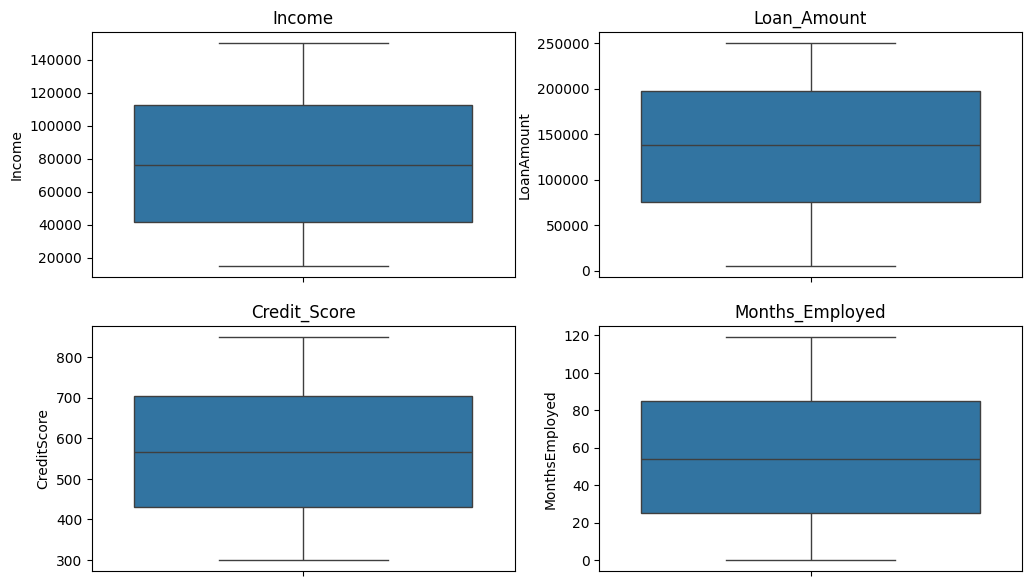

In [62]:
plt.figure(figsize=(12,7))
plt.subplot(2,2,1)
plt.title('Income')
sns.boxplot(data['Income'])

plt.subplot(2,2,2)
plt.title('Loan_Amount')
sns.boxplot(data['LoanAmount'])

plt.subplot(2,2,3)
plt.title('Credit_Score')
sns.boxplot(data['CreditScore'])

plt.subplot(2,2,4)
plt.title('Months_Employed')
sns.boxplot(data['MonthsEmployed'])


plt.show()

In [63]:
# plt.figure(figsize=(12,7))
# sns.barplot(x='Age',y='Default',data=data)
# plt.show()

<Axes: >

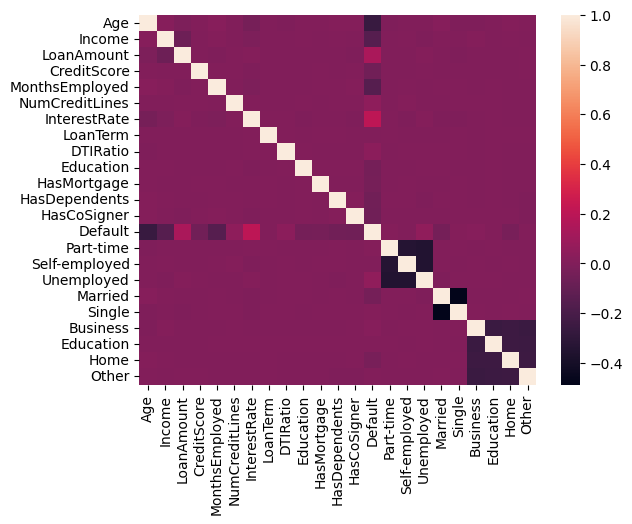

In [64]:
sns.heatmap(data.corr())

In [65]:
data.corr()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,...,Default,Part-time,Self-employed,Unemployed,Married,Single,Business,Education,Home,Other
Age,1.000000,0.013305,-0.016594,0.005363,0.023251,-0.003925,-0.036832,-0.004281,-0.008632,0.005497,...,-0.262618,-0.006100,-0.001079,-0.004287,0.012528,-0.008542,-0.005137,-0.002212,0.007488,0.004546
Income,0.013305,1.000000,-0.069572,-0.002138,0.007928,-0.003425,-0.014017,-0.000014,-0.000637,0.003743,...,-0.151394,-0.002629,0.004274,-0.010266,0.000828,-0.001206,0.007775,-0.004889,0.001865,-0.003200
LoanAmount,-0.016594,-0.069572,1.000000,-0.001435,-0.007687,0.004323,0.006845,-0.002009,-0.000024,0.000026,...,0.135371,-0.001011,-0.004211,0.007476,-0.000909,-0.005448,-0.003199,-0.001154,-0.002319,0.002247
CreditScore,0.005363,-0.002138,-0.001435,1.000000,0.004404,0.001871,-0.006237,-0.001404,0.000228,-0.001580,...,-0.052200,-0.001600,0.000188,0.001946,-0.001399,-0.000144,-0.002039,-0.000213,-0.000051,0.002679
MonthsEmployed,0.023251,0.007928,-0.007687,0.004404,1.000000,-0.002269,-0.015593,-0.002725,-0.001941,-0.002502,...,-0.151503,-0.003812,0.002642,-0.001857,0.004815,0.004481,-0.004240,0.001792,0.000459,-0.001469
NumCreditLines,-0.003925,-0.003425,0.004323,0.001871,-0.002269,1.000000,0.005001,-0.002476,-0.001879,0.002385,...,0.043870,-0.002777,0.006912,-0.002274,-0.001564,0.000936,0.001097,0.006152,-0.001155,-0.001403
InterestRate,-0.036832,-0.014017,0.006845,-0.006237,-0.015593,0.005001,1.000000,0.002614,0.004473,-0.007282,...,0.205668,0.002761,-0.005449,0.007966,-0.006068,-0.007138,0.000545,0.003305,0.000738,-0.004095
LoanTerm,-0.004281,-0.000014,-0.002009,-0.001404,-0.002725,-0.002476,0.002614,1.000000,0.004432,0.000077,...,0.000055,0.002686,-0.003966,0.000777,0.000495,0.001325,-0.004512,0.000879,0.000796,0.002055
DTIRatio,-0.008632,-0.000637,-0.000024,0.000228,-0.001941,-0.001879,0.004473,0.004432,1.000000,0.003113,...,0.030191,0.000675,0.004207,0.001497,0.002691,0.003338,-0.000034,0.004588,-0.000798,-0.004286
Education,0.005497,0.003743,0.000026,-0.001580,-0.002502,0.002385,-0.007282,0.000077,0.003113,1.000000,...,-0.045026,0.000642,-0.002980,0.001435,0.001420,-0.001402,-0.003419,0.001427,-0.003869,-0.001116


In [66]:
data.columns

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education',
       'HasMortgage', 'HasDependents', 'HasCoSigner', 'Default', 'Part-time',
       'Self-employed', 'Unemployed', 'Married', 'Single', 'Business',
       'Education', 'Home', 'Other'],
      dtype='object')

In [67]:
import scipy.stats as stat
from scipy.stats import boxcox

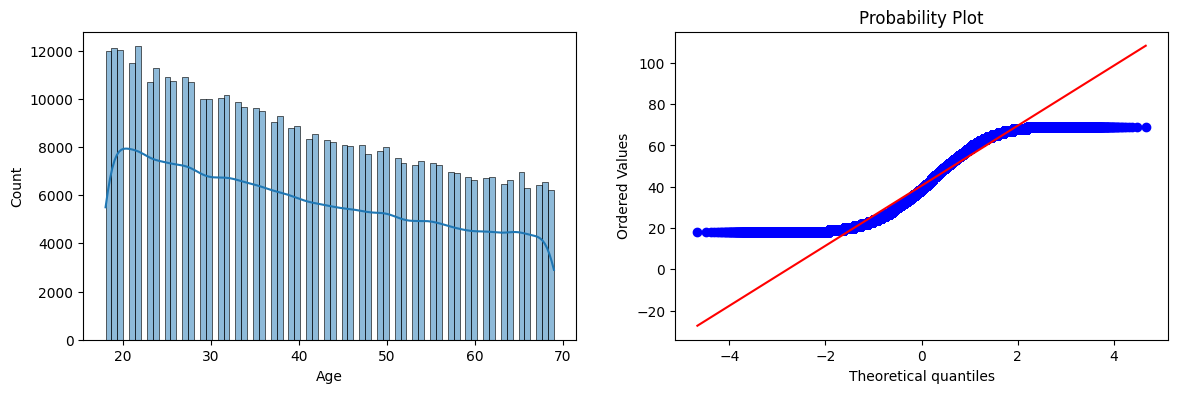

In [68]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.histplot(data['Age'], kde =True)

plt.subplot(1,2,2)
stat.probplot(data['Age'], dist='norm', plot=plt)
plt.show()

In [69]:
age , l = boxcox(data['Age'])

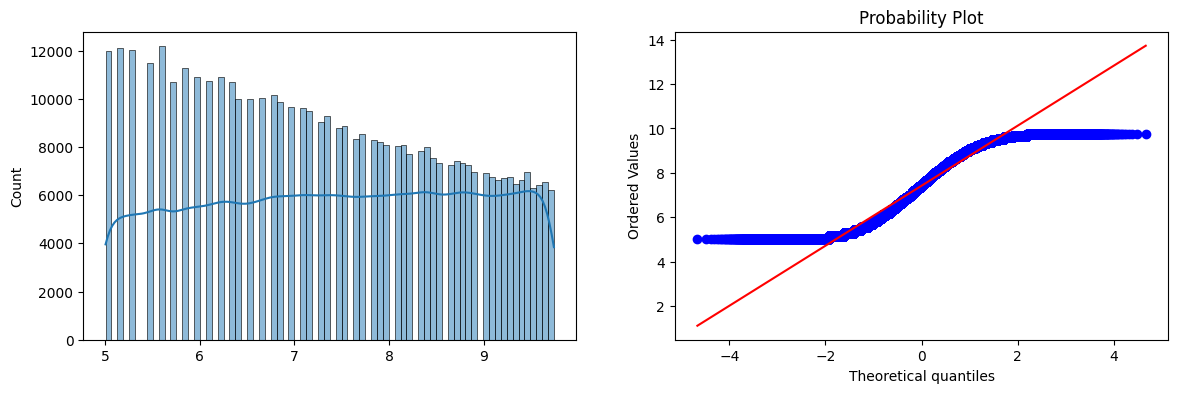

In [70]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.histplot(age, kde =True)

plt.subplot(1,2,2)
stat.probplot(age, dist='norm', plot=plt)
plt.show()

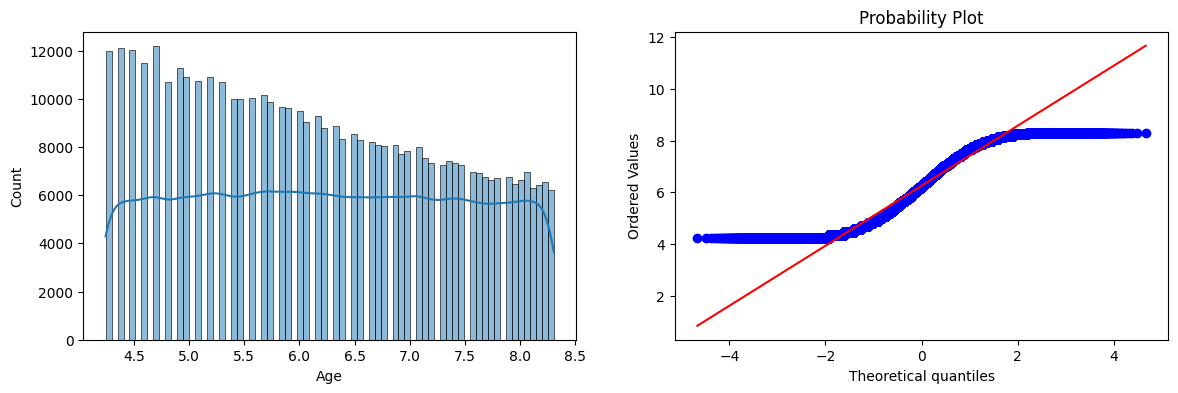

In [71]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.histplot(np.sqrt(data['Age']), kde =True)

plt.subplot(1,2,2)
stat.probplot(np.sqrt(data['Age']), dist='norm', plot=plt)
plt.show()

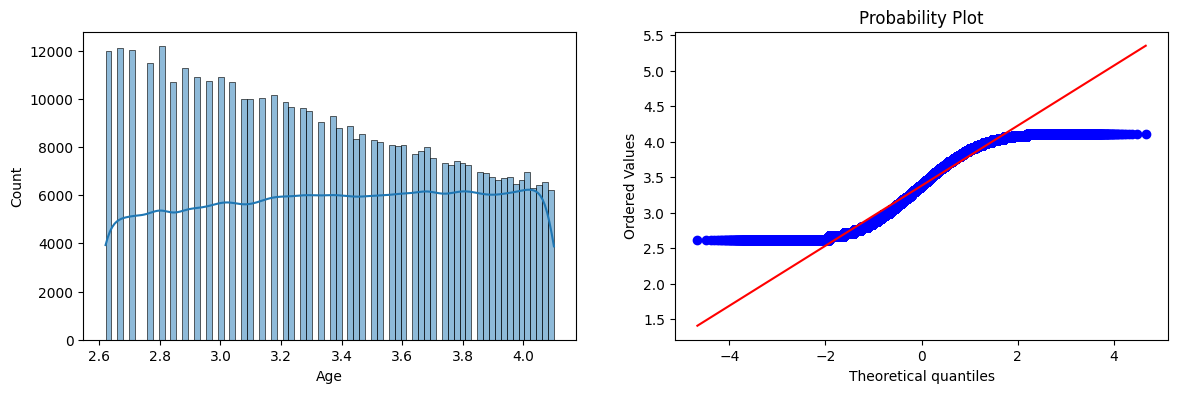

In [72]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.histplot(data['Age']**(1/3), kde =True)

plt.subplot(1,2,2)
stat.probplot(data['Age']**(1/3), dist='norm', plot=plt)
plt.show()

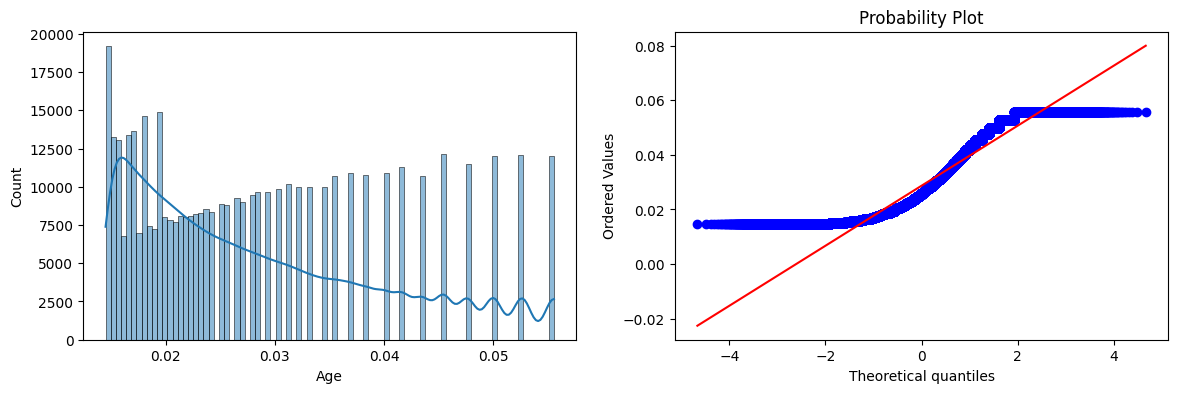

In [73]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.histplot(1/data['Age'], kde =True)

plt.subplot(1,2,2)
stat.probplot(1/data['Age'], dist='norm', plot=plt)
plt.show()

In [74]:
lage = np.log(data['Age'])

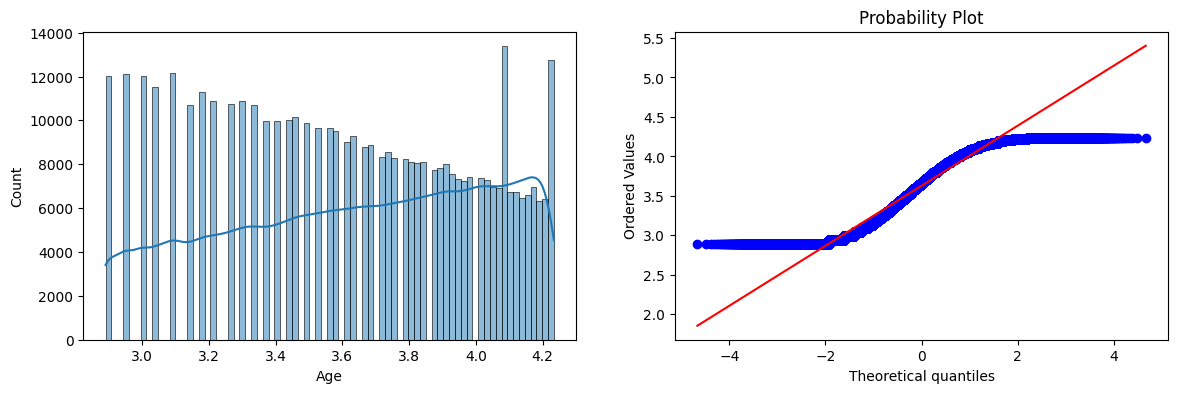

In [75]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.histplot(lage, kde =True)

plt.subplot(1,2,2)
stat.probplot(lage, dist='norm', plot=plt)
plt.show()

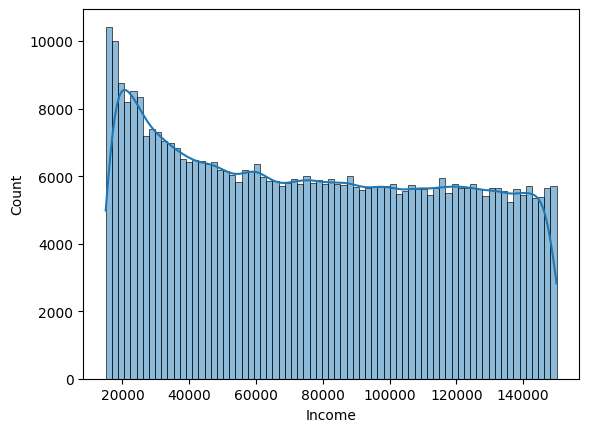

In [76]:
sns.histplot(data['Income'] , kde =True)
plt.show()

In [77]:
a1 = np.log10(data['Income'])
a1.head(3)

0    4.934468
1    4.702706
2    4.925353
Name: Income, dtype: float64

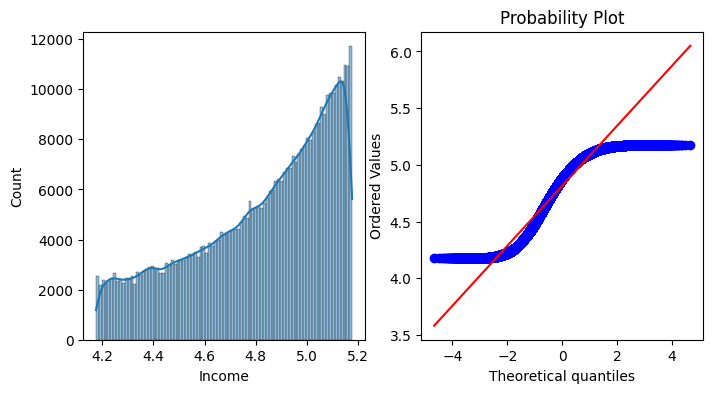

In [78]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.histplot(a1 , kde =True)

plt.subplot(1,2,2)
stat.probplot(a1 , dist='norm', plot=plt)
plt.show()

In [79]:

a2, lambda_value = boxcox(data['Income'])


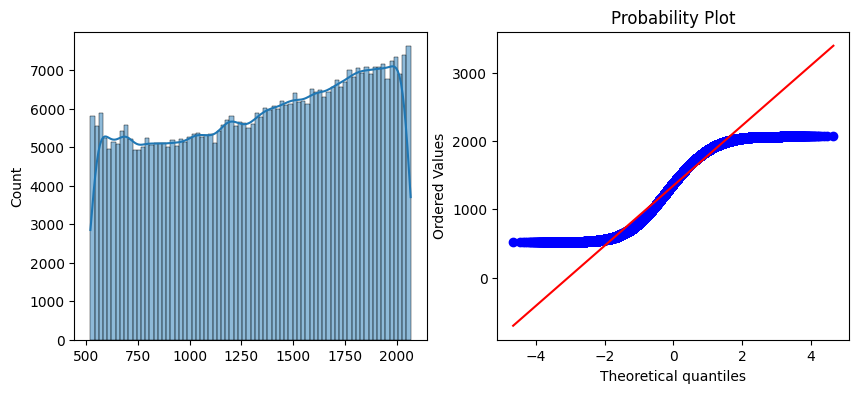

In [80]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(a2 , kde =True)

plt.subplot(1,2,2)
stat.probplot(a2 , dist='norm', plot=plt)
plt.show()

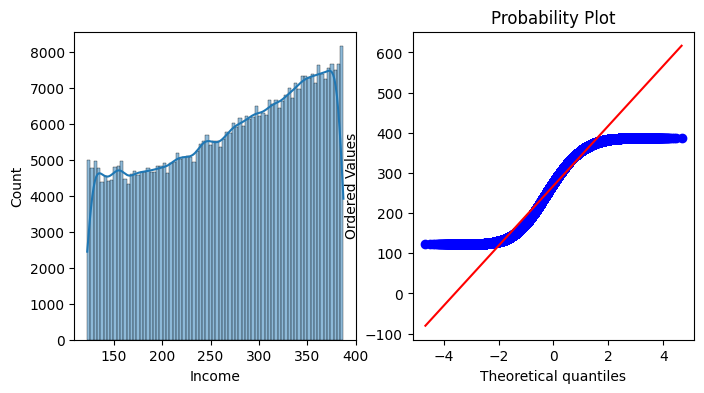

In [81]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.histplot(data['Income']**(1/2), kde =True)

plt.subplot(1,2,2)
stat.probplot(data['Income']**(1/2) , dist='norm', plot=plt)
plt.show()

In [82]:
rank1 = data['Income'].rank()
a3= rank1 / len(rank1)


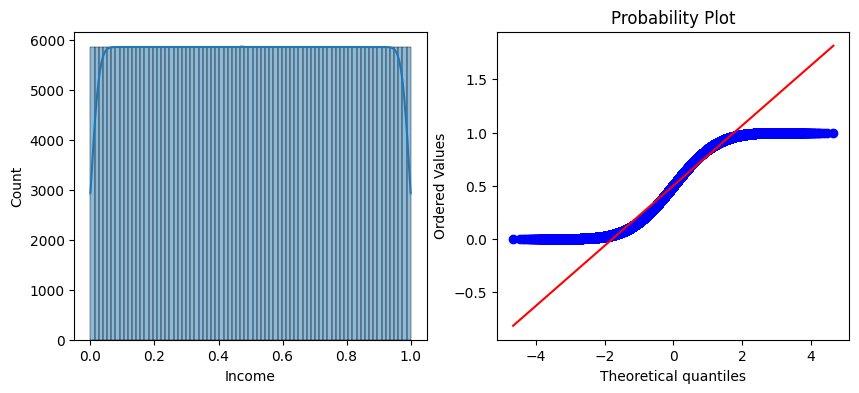

In [83]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(a3, kde =True)

plt.subplot(1,2,2)
stat.probplot(a3, dist='norm', plot=plt)
plt.show()

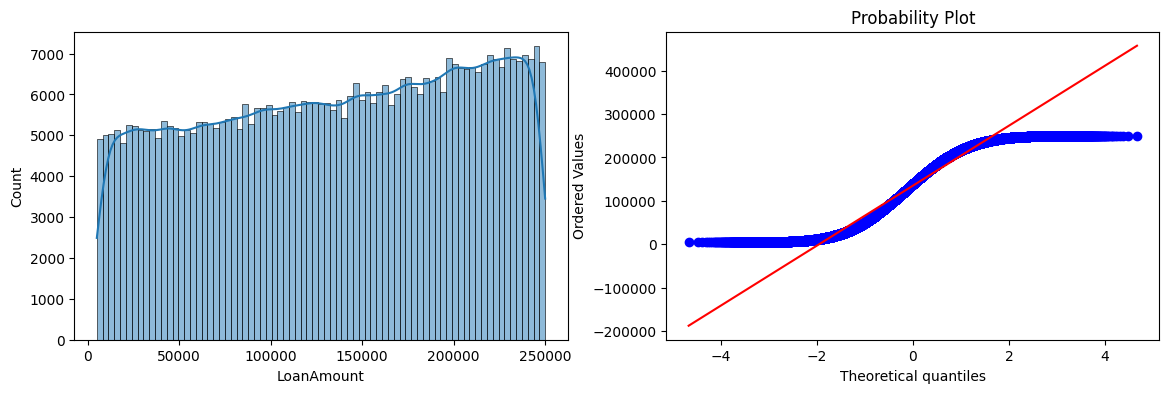

In [84]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.histplot(data['LoanAmount'], kde =True)

plt.subplot(1,2,2)
stat.probplot(data['LoanAmount'], dist='norm', plot=plt)
plt.show()

In [85]:
b1 , lambda_v = boxcox(data['LoanAmount'])

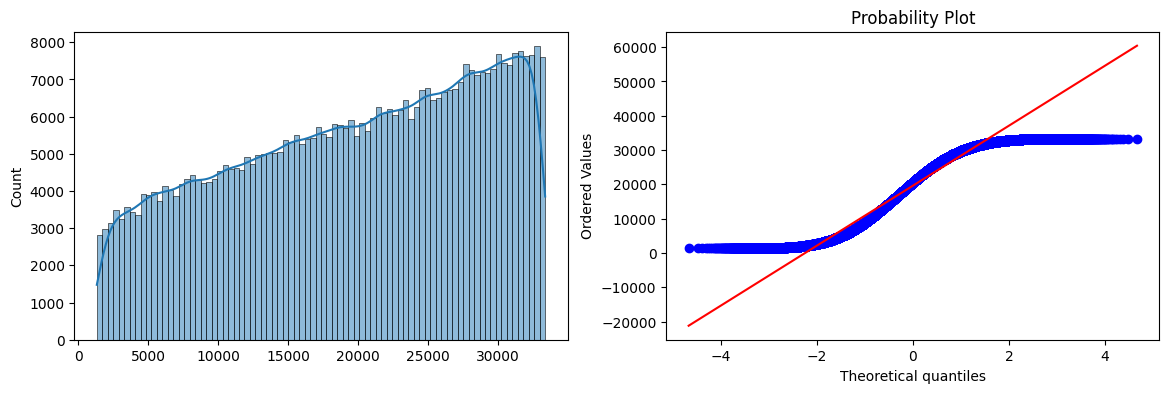

In [86]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.histplot(b1, kde =True)

plt.subplot(1,2,2)
stat.probplot(b1, dist='norm', plot=plt)
plt.show()

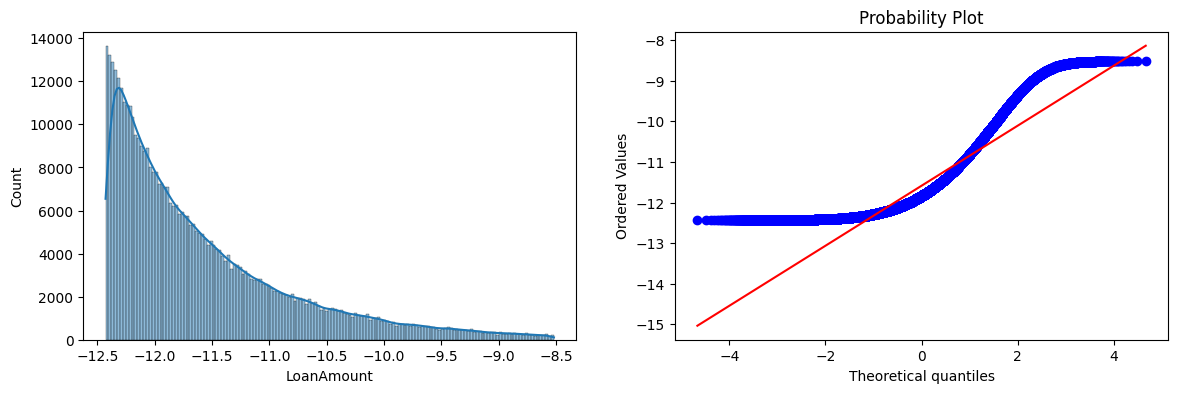

In [87]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.histplot(np.log(1/data['LoanAmount']), kde =True)

plt.subplot(1,2,2)
stat.probplot(np.log(1/data['LoanAmount']), dist='norm', plot=plt)
plt.show()

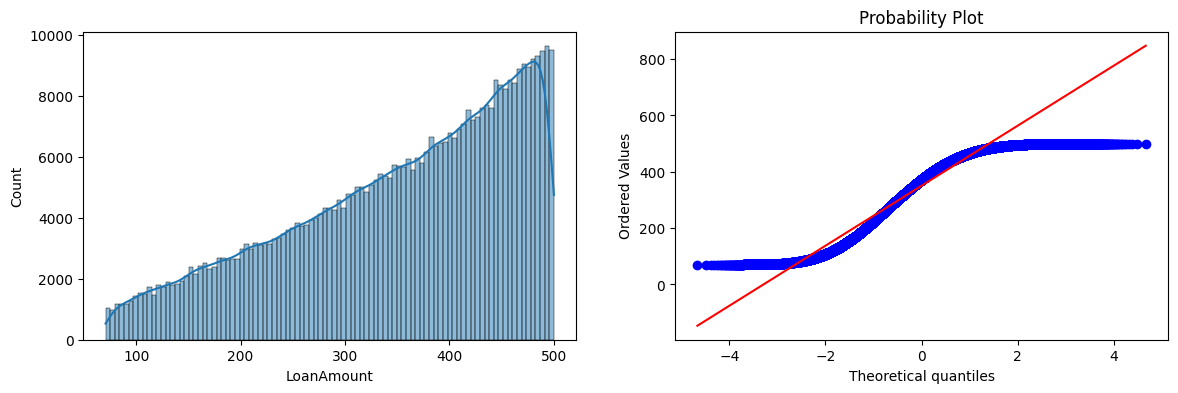

In [88]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.histplot(data['LoanAmount']**(1/2), kde =True)

plt.subplot(1,2,2)
stat.probplot(data['LoanAmount']**(1/2), dist='norm', plot=plt)
plt.show()

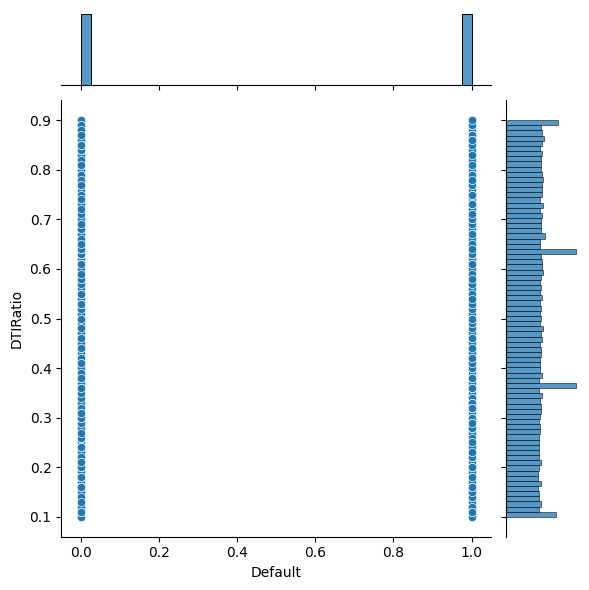

In [89]:
sns.jointplot(data=data,x='Default',y='DTIRatio')
plt.show()

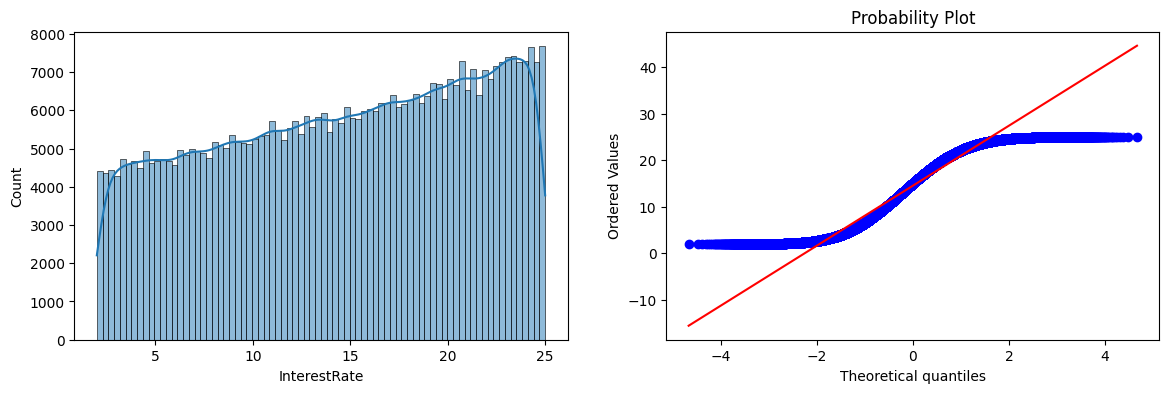

In [90]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.histplot(data['InterestRate'], kde =True)

plt.subplot(1,2,2)
stat.probplot(data['InterestRate'], dist='norm', plot=plt)
plt.show()

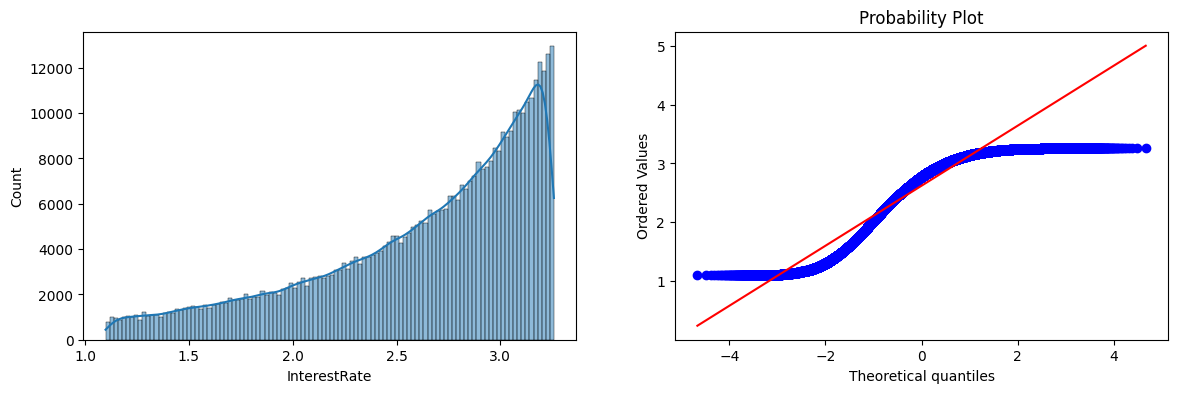

In [91]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.histplot(np.log1p(data['InterestRate']), kde =True)

plt.subplot(1,2,2)
stat.probplot(np.log1p(data['InterestRate']), dist='norm', plot=plt)
plt.show()

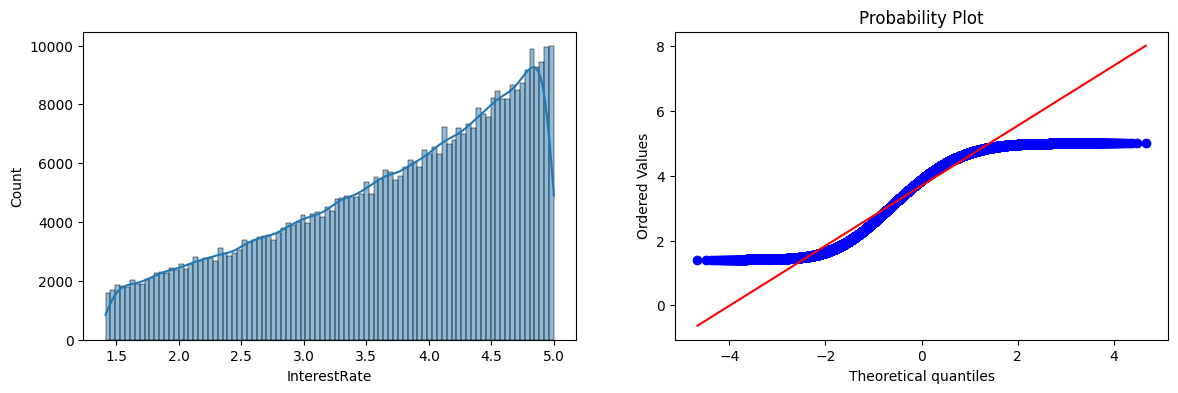

In [92]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.histplot(np.sqrt(data['InterestRate']), kde =True)

plt.subplot(1,2,2)
stat.probplot(np.sqrt(data['InterestRate']), dist='norm', plot=plt)
plt.show()

In [93]:
ir , irlambda = boxcox(data['InterestRate'])

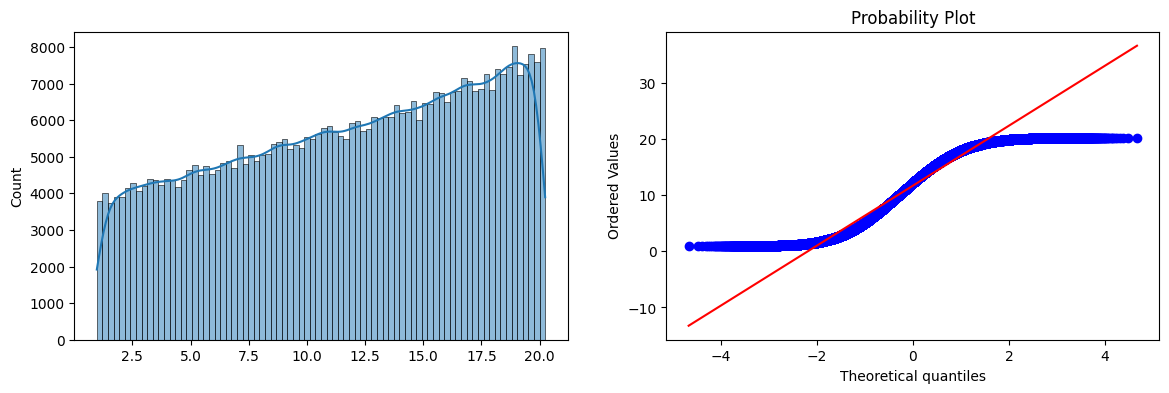

In [94]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.histplot(ir, kde =True)

plt.subplot(1,2,2)
stat.probplot(ir, dist='norm', plot=plt)
plt.show()

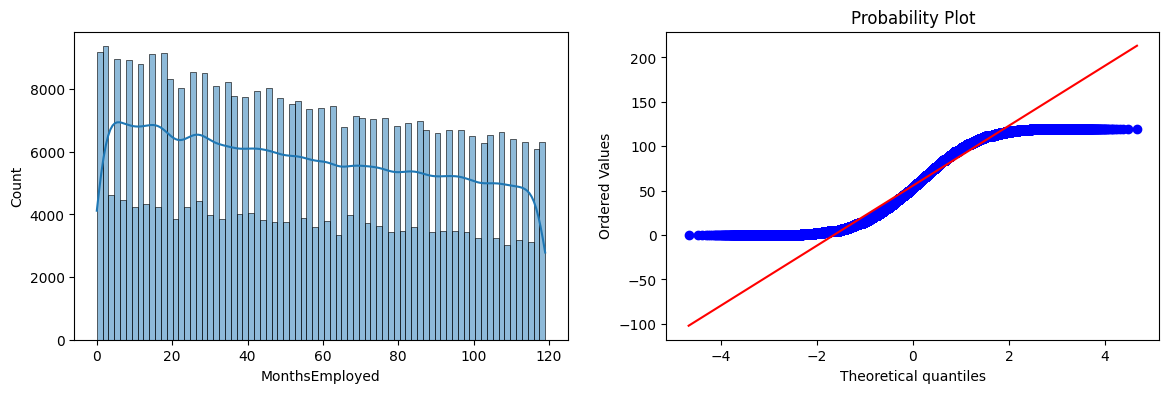

In [95]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.histplot(data['MonthsEmployed'], kde =True)

plt.subplot(1,2,2)
stat.probplot(data['MonthsEmployed'], dist='norm', plot=plt)
plt.show()

In [96]:
data.head(3)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,...,Default,Part-time,Self-employed,Unemployed,Married,Single,Business,Education,Home,Other
0,56,85994,50587,520,80,4,15.23,36,0.44,1,...,0,0,0,0,0,0,0,0,0,1
1,69,50432,124440,458,15,1,4.81,60,0.68,2,...,0,0,0,0,1,0,0,0,0,1
2,46,84208,129188,451,26,3,21.17,24,0.31,2,...,1,0,0,1,0,0,0,0,0,0


In [97]:
x = data.drop('Default',axis=1)
x.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,...,HasCoSigner,Part-time,Self-employed,Unemployed,Married,Single,Business,Education,Home,Other
0,56,85994,50587,520,80,4,15.23,36,0.44,1,...,1,0,0,0,0,0,0,0,0,1
1,69,50432,124440,458,15,1,4.81,60,0.68,2,...,1,0,0,0,1,0,0,0,0,1
2,46,84208,129188,451,26,3,21.17,24,0.31,2,...,0,0,0,1,0,0,0,0,0,0
3,32,31713,44799,743,0,3,7.07,24,0.23,0,...,0,0,0,0,1,0,1,0,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,1,...,0,0,0,1,0,0,0,0,0,0


In [98]:
y = data['Default']
y

0         0
1         0
2         1
3         0
4         0
         ..
451383    1
451384    1
451385    1
451386    1
451387    1
Name: Default, Length: 451388, dtype: int64

In [99]:
x_tr , x_te, y_tr, y_te = train_test_split(x,y,train_size=0.77,random_state=99)

In [100]:
scaler = StandardScaler()

In [101]:
x_tr_sc = scaler.fit_transform(x_tr)
x_te_sc = scaler.transform(x_te)

In [102]:
x_tr_sc

array([[ 0.30221083, -1.31107052,  1.18690414, ..., -0.50194312,
        -0.48530462, -0.50241923],
       [-1.03833942,  0.32796362, -1.50511534, ..., -0.50194312,
        -0.48530462, -0.50241923],
       [ 1.91087113, -0.2960682 ,  1.33963211, ..., -0.50194312,
        -0.48530462, -0.50241923],
       ...,
       [ 0.90545845,  0.06301129,  0.35153125, ..., -0.50194312,
        -0.48530462,  1.99036967],
       [-0.97131191,  0.8835008 ,  1.17945227, ..., -0.50194312,
        -0.48530462, -0.50241923],
       [-0.50211932, -1.19569931, -1.01684117, ..., -0.50194312,
         2.06056146, -0.50241923]])

In [166]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [104]:
svm = SVC()

In [105]:
# svm.fit(x_tr_sc,y_tr)

In [106]:
# svm.score(x_tr_sc,y_tr)  #72

In [107]:
# y_pred6 = svm.predict(x_te_sc)

In [108]:
# accuracy_score(y_pred6,y_te)

In [109]:
from sklearn.ensemble import RandomForestClassifier

In [110]:
rfc = RandomForestClassifier()

In [111]:
rfc.fit(x_tr_sc,y_tr)

RandomForestClassifier()

In [112]:
rfc.score(x_tr_sc,y_tr)

1.0

In [113]:
y_pred = rfc.predict(x_te_sc)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [114]:
accuracy_score(y_pred,y_te)

0.9906376420728183

In [116]:
from sklearn.linear_model import LogisticRegression

In [117]:
lr = LogisticRegression()

In [118]:
lr.fit(x_tr_sc,y_tr)

LogisticRegression()

In [119]:
lr.score(x_tr_sc,y_tr)

0.6820017953321365

In [120]:
y_pred2 = lr.predict(x_te_sc)

In [121]:
accuracy_score(y_pred2,y_te)

0.6828838374109035

In [122]:
params = {'C':[0.001,0.01,0.1,1,10,20,50,100,200,500,800], 'penalty':['l1','l2']}

In [123]:
lrgscv = GridSearchCV(lr , params ,cv=10)

In [124]:
lrgscv.fit(x_tr_sc,y_tr)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 20, 50, 100, 200, 500,
                               800],
                         'penalty': ['l1', 'l2']})

In [125]:
lrgscv.best_params_

{'C': 0.001, 'penalty': 'l2'}

In [126]:
lrgscv.best_score_

0.6820276790235192

In [127]:
y_pred5 = lrgscv.predict(x_te_sc)

In [128]:
accuracy_score(y_pred5,y_te)

0.6830764785205162

In [129]:
from sklearn.neighbors import KNeighborsClassifier

In [130]:
knn = KNeighborsClassifier()

In [131]:
knn.fit(x_tr_sc,y_tr)

KNeighborsClassifier()

In [132]:
knn.score(x_tr_sc,y_tr)

0.8851160060765088

In [133]:
y_pred3 = knn.predict(x_te_sc)

In [134]:
accuracy_score(y_pred3,y_te)

0.8284530918898093

In [135]:
from sklearn.ensemble import AdaBoostClassifier

In [136]:
abc = AdaBoostClassifier()

In [137]:
abc.fit(x_tr_sc,y_tr)

AdaBoostClassifier()

In [138]:
abc.score(x_tr_sc,y_tr)

0.6834547484233301

In [139]:
y_pred4 = abc.predict(x_te_sc)

In [140]:
accuracy_score(y_pred4,y_te)

0.6832209593527259

In [141]:
from sklearn.decomposition import PCA

In [142]:
x1 = data.drop('Default',axis=1)
x1.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,...,HasCoSigner,Part-time,Self-employed,Unemployed,Married,Single,Business,Education,Home,Other
0,56,85994,50587,520,80,4,15.23,36,0.44,1,...,1,0,0,0,0,0,0,0,0,1
1,69,50432,124440,458,15,1,4.81,60,0.68,2,...,1,0,0,0,1,0,0,0,0,1
2,46,84208,129188,451,26,3,21.17,24,0.31,2,...,0,0,0,1,0,0,0,0,0,0
3,32,31713,44799,743,0,3,7.07,24,0.23,0,...,0,0,0,0,1,0,1,0,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,1,...,0,0,0,1,0,0,0,0,0,0


In [143]:
scaled_data = scaler.fit_transform(x1)

In [144]:
pca = PCA(n_components=4)

In [145]:
X = pca.fit_transform(scaled_data)

In [146]:
X

array([[-0.0489963 , -0.0867796 ,  0.06112858, -0.88569012],
       [ 1.5679698 ,  0.15671278, -0.06727628, -0.43751253],
       [-0.04545423,  1.57061865, -0.06389662, -0.14263917],
       ...,
       [-0.08100589, -0.83829458,  2.08983941,  1.32629115],
       [-0.01736267, -1.08743219, -0.92063213,  1.40417356],
       [-1.36070024, -1.18421896,  1.34078718, -0.3543678 ]])

In [147]:
x_train,x_test,y_train,y_test= train_test_split(X,y,train_size=0.75,random_state=36)

In [148]:
abc.fit(x_train,y_train)

AdaBoostClassifier()

In [149]:
abc.score(x_train,y_train)

0.5570758047031231

In [150]:
yp = abc.predict(x_test)

In [151]:
accuracy_score(yp,y_test)

0.5557524790202664

In [152]:
data.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,...,Default,Part-time,Self-employed,Unemployed,Married,Single,Business,Education,Home,Other
0,56,85994,50587,520,80,4,15.23,36,0.44,1,...,0,0,0,0,0,0,0,0,0,1
1,69,50432,124440,458,15,1,4.81,60,0.68,2,...,0,0,0,0,1,0,0,0,0,1
2,46,84208,129188,451,26,3,21.17,24,0.31,2,...,1,0,0,1,0,0,0,0,0,0
3,32,31713,44799,743,0,3,7.07,24,0.23,0,...,0,0,0,0,1,0,1,0,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,1,...,0,0,0,1,0,0,0,0,0,0


In [153]:
from sklearn.decomposition import PCA

In [154]:
pca = PCA(n_components=5)

In [155]:
new_data = pca.fit_transform(data.drop('Default',axis=1))

In [156]:
new_data

array([[ 8.46765118e+04,  3.27608816e+03, -4.81348274e+01,
         2.43636957e+01,  2.70148679e-01],
       [ 8.89012307e+03, -2.79544223e+04, -1.10246785e+02,
        -3.99274489e+01, -2.33892662e+01],
       [ 6.10380848e+03,  6.03966736e+03, -1.16928733e+02,
        -2.93904307e+01,  1.21809733e+01],
       ...,
       [ 3.43615145e+04, -5.33893749e+04, -5.05649536e+01,
        -3.72468986e+01,  2.41197350e+01],
       [ 1.98523484e+04, -4.84428240e+04, -2.15422989e+02,
         1.49248976e+01,  1.85220498e-02],
       [ 1.50414615e+04,  3.67030195e+04, -5.46974806e+01,
        -4.08271458e+01, -2.39163169e+01]])

In [157]:
x = new_data
y = data['Default']

In [158]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 45, shuffle = True, stratify = y)

In [159]:
from sklearn.ensemble import RandomForestClassifier

In [160]:
rfc = RandomForestClassifier()

In [161]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [162]:
rfc.score(x_train,y_train)

1.0

In [163]:
y_p = rfc.predict(x_test)

In [164]:
accuracy_score(y_p,y_test)

0.9806671245116935